<a href="https://colab.research.google.com/github/ajaythakur3369/CodeClause-Internship/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Gold Price Prediction**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - CodeClause**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/CodeClause-Internship)**

## **1. Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## **2. Data Collection and Processing**

In [ ]:
# Access the drive from Colab to access the required file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# The path to access the required file from Drive
gold_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/CodeClause/File_Name/Gold_price_dataset.csv')

In [ ]:
# Print the first 5 rows of the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# Print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# The count of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# Gathering some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# Checking for the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Obtaining the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## **3. Correlation**

1.   Positive Correlation
2.   Negative Correlation



In [ ]:
# Assuming 'date_column_name' is the name of your date column
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Now compute the correlation
correlation = gold_data.corr()

<Axes: >

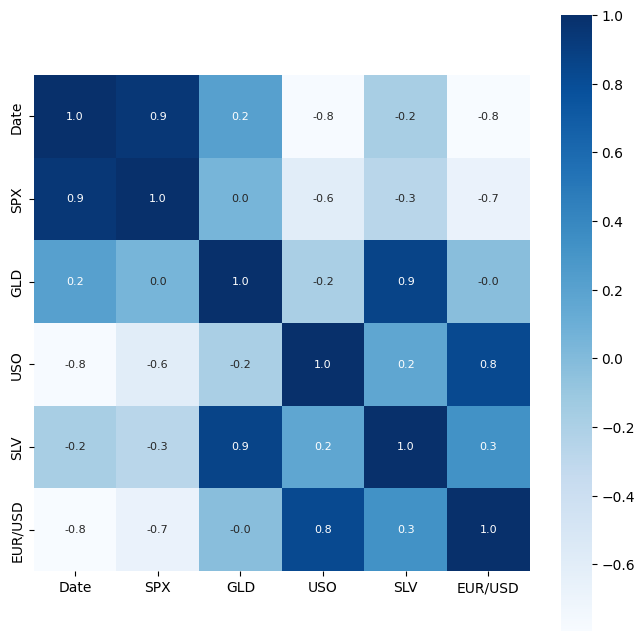

In [ ]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f',annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [ ]:
# Correlation values for GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-96-c5932278ace1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'green')
<ipython-input-96-c5932278ace1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

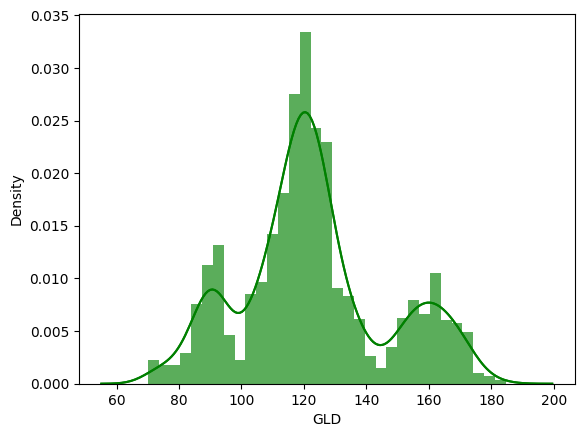

In [ ]:
# Checking the distribution of the GLD price
sns.distplot(gold_data['GLD'], color = 'green')
sns.distplot(gold_data['GLD'], color = 'green')

## **4. Splitting the Features and Target**

In [ ]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## **5. Splitting the data into training and testing sets**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

## **6. Model Training: Random Forest Regressor**

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)

In [ ]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

## **7. Model Evalution**

In [ ]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.70269944  81.76479999 116.03590056 127.48760092 120.75780162
 154.69079814 150.32649897 126.3947999  117.5613988  125.98770048
 116.61030132 171.77040053 141.41909828 167.80289797 115.24710002
 117.47090034 139.06780256 170.25220083 160.00490288 157.88219989
 155.07869984 125.00610038 175.86940029 157.1293036  125.1488004
  93.9382996   78.09699994 120.42260026 119.1198998  167.37669964
  88.0886007  125.25950011  91.28120089 117.5547004  121.12139912
 135.84310002 115.67460121 115.14520074 148.23669936 107.32880099
 103.9784022   87.32189793 126.52430026 117.73680016 153.34999879
 119.61929994 108.42699968 108.30329806  93.15790024 126.99139817
  74.41030042 113.73979947 121.27769965 111.20389917 118.86309876
 120.87129933 158.85630164 168.73890154 146.80469664  85.91099841
  94.24170041  86.91199864  90.57920036 118.89050087 126.42420041
 127.74479982 170.17640038 122.28949946 117.42209922  98.3909002
 167.92460103 142.68879783 132.01760272 121.14050215 120.80779951
 119.6020004

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9883975865346033


## **8. Compare the Actual values and Predicted values in a plot**

In [ ]:
Y_test = list(Y_test)

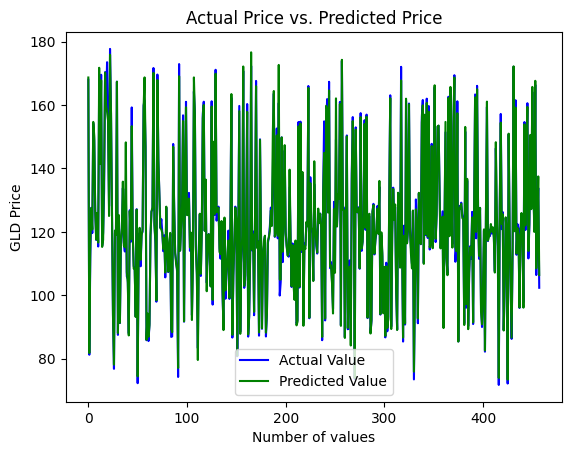

In [ ]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs. Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()